### Dataset



RollNum:21100313
Kaggle UserName: TK11

The dataset is divided into training set and testing set. The training set is labeled and contains 80 images for each class (Total 240 images). You have been given unlabeled test set and your task is to predict the class of each test image. The test set contain 853 images.<br>
Some guidelines:<br>
- You are free to extend or augment the training set.<br>
- If you want, you can use a subset of training set as your validation set.<br>
- You must not use the provided test set in any way except for final predictions.<br>

In [1]:
!git clone https://github.com/MMFa666/VehicleDataset.git

Cloning into 'VehicleDataset'...
remote: Enumerating objects: 1106, done.
remote: Counting objects: 100% (1106/1106), done.
remote: Compressing objects: 100% (1100/1100), done.
remote: Total 1106 (delta 4), reused 1103 (delta 4), pack-reused 0
Receiving objects: 100% (1106/1106), 34.18 MiB | 44.19 MiB/s, done.
Resolving deltas: 100% (4/4), done.


### Models


You can use anyone of the following models for this task. See the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications#functions) for more details.
- VGG
- ResNet
- MobileNet
- EfficientNet

### LeaderBoard

The goal here is to get the maximum performance on test set. For this purpose, we have created a competition on Kaggle where a leaderboard is maintained. You will upload your predictions for test set there and a score will be generated for you. You will be ranked based on your score. You can submit upto 20 times a day with maximum 300 submissions in total.

This part will be evaluated based on your approach and your performance in LeaderBoard. Furthermore, the top student will receive a 5%, 2nd will receive 3% and 3rd will receive 1% bonus.

You are allowed to the following to win:
- Extend your chosen model as you like.
- Extend the training set.
- Augment the training set.
- Play with hyperparameters.
- Preprocess the data as you like.

Competition link [here](https://www.kaggle.com/c/lums-cs437-hw3/)

### Tutuorial Example

You are recommended to follow this [tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning) for this task. All the hints and information required are available here and this task can be easily completed by following it. In this tutorial, they use MobileNet but as mentioned above you are free to use any of the abovementioned models.

### Let The Games Begin!!!

In [2]:
# make necessary imports here
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import os
import keras
import shutil
from glob import glob
from pprint import pprint
import tensorflow as tf
import cv2
from tqdm.notebook import trange,tqdm
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, LeakyReLU, Flatten, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from skimage.transform import resize

In [3]:
def extract_label(filepath = None, datatype = None):
  fs = filepath.split("/")
  if datatype == "train":
    label = fs[4]
  if datatype == "test":
    label = fs[3]
  return label

def load_dataset(filepaths = None , datatype = None):
  X = []
  Y = []
  labels={}
  labels['qingqi']=[1,0,0]
  labels['rickshaw']=[0,1,0]
  labels['tanga']=[0,0,1]
  for filepath in filepaths:
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = resize(img, input_shape, preserve_range=True)
    X.append(img)
    label  = extract_label(filepath = filepath, datatype = datatype)
    y = labels[label]
    Y.append(y)
  return X,Y

In [4]:
# define hyperparameters
batch_size = 32
epochs = 400
learning_rate = 0.00001
input_shape = (200,200)

In [5]:
training_dir = os.path.join(os.getcwd(),"VehicleDataset","train")
testing_dir = os.path.join(os.getcwd(),"VehicleDataset","test")
validation_dir =  os.path.join(os.getcwd(),"VehicleDataset","validation")

In [6]:

if not os.path.isdir(validation_dir):
  os.mkdir(validation_dir)
qingqi_val_dir = os.path.join(validation_dir,"qingqi")
rickshaw_val_dir = os.path.join(validation_dir,"rickshaw")
tanga_val_dir = os.path.join(validation_dir,"tanga")
if not os.path.isdir(qingqi_val_dir):
  os.mkdir(qingqi_val_dir)
if not os.path.isdir(rickshaw_val_dir):
  os.mkdir(rickshaw_val_dir)
if not os.path.isdir(tanga_val_dir):
  os.mkdir(tanga_val_dir)

In [7]:
# read and preprocess the training data and extract the labels. (If your training data is large then you can also use batch generator like done in PartB.)
# print the shape x and y data
# split into validation set if you desire
training_paths =  []
for filename in glob(os.path.join(training_dir,"**"),recursive=True):
  filepath = filename.split("/")
  if len(filepath) == 6:
    training_paths.append(filename)


In [8]:
testing_paths =  []
for filename in glob(os.path.join(testing_dir,"**"),recursive=True):
  filepath = filename.split("/")
  if len(filepath) == 5 and filepath[-1] != '':
    testing_paths.append(filename)


In [9]:
train_paths,val_paths = train_test_split(training_paths,test_size = 0.1)
for val_path in val_paths:
  splits= val_path.split("/")
  filename = splits[-1]
  label = splits[4]
  new_filepath = os.path.join(validation_dir,label,filename)
  if not os.path.isfile(new_filepath):
    shutil.move(val_path,new_filepath)
  print("moving file from",val_path," to ",filepath)

moving file from /content/VehicleDataset/train/qingqi/f99843280.jpg  to  ['', 'content', 'VehicleDataset', 'test', 'f58077242.jpg']
moving file from /content/VehicleDataset/train/tanga/f36609940.jpg  to  ['', 'content', 'VehicleDataset', 'test', 'f58077242.jpg']
moving file from /content/VehicleDataset/train/tanga/f33783265.jpg  to  ['', 'content', 'VehicleDataset', 'test', 'f58077242.jpg']
moving file from /content/VehicleDataset/train/rickshaw/f47236198.jpg  to  ['', 'content', 'VehicleDataset', 'test', 'f58077242.jpg']
moving file from /content/VehicleDataset/train/qingqi/f92467888.jpg  to  ['', 'content', 'VehicleDataset', 'test', 'f58077242.jpg']
moving file from /content/VehicleDataset/train/rickshaw/f44247255.jpg  to  ['', 'content', 'VehicleDataset', 'test', 'f58077242.jpg']
moving file from /content/VehicleDataset/train/rickshaw/f22561633.jpg  to  ['', 'content', 'VehicleDataset', 'test', 'f58077242.jpg']
moving file from /content/VehicleDataset/train/qingqi/f51879937.jpg  to 

In [10]:
train_dataset = image_dataset_from_directory(training_dir,
                                            shuffle=True,
                                            batch_size=batch_size,
                                            image_size=input_shape,
                                             label_mode = 'categorical')

Found 216 files belonging to 3 classes.


In [11]:
validation_dataset = image_dataset_from_directory(validation_dir,
                                             shuffle=True,
                                             batch_size=batch_size,
                                             image_size=input_shape,
                                             label_mode = 'categorical')

Found 24 files belonging to 3 classes.


### Feature Extraction

In this step, you will freeze the convolutional base created from the previous step and to use as a feature extractor. Additionally, you add a classifier on top of it and train the top-level classifier.

In [12]:
preprocess_input = tf.keras.applications.efficientnet.preprocess_input


In [13]:
# intialize the base model here and print the model summary
base_model = tf.keras.applications.EfficientNetB7(input_shape=input_shape +(3,),
                                               include_top=False,
                                               weights='imagenet')

258080768/258076736 [==============================] - 2s 0us/step


In [14]:
# Freeze the base Model
base_model.trainable = False

It is important to freeze the convolutional base before you compile and train the model. Freezing (by setting layer.trainable = False) prevents the weights in a given layer from being updated during training. 

In [15]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [16]:
inputs = tf.keras.Input(shape=input_shape + (3,))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(3,activation ="softmax")(x)
model = tf.keras.Model(inputs, outputs)

In [17]:
# compile the model and print the summary

model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 200, 200, 3)       0         
_________________________________________________________________
efficientnetb7 (Functional)  (None, 7, 7, 2560)        64097687  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2560)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 7683      
Total params: 64,105,370
Trainable params: 7,683
Non-trainable params: 64,097,687
_____________________________________________

In [18]:
# fit the model
model_path = os.path.join(os.getcwd(),"model")
history = model.fit(train_dataset,epochs=epochs)
model.save(model_path)

Epoch 1/400
7/7 [==============================] - 51s 495ms/step - loss: 1.1634 - accuracy: 0.2979
Epoch 2/400
7/7 [==============================] - 2s 305ms/step - loss: 1.1564 - accuracy: 0.3044
Epoch 3/400
7/7 [==============================] - 2s 308ms/step - loss: 1.1707 - accuracy: 0.2768
Epoch 4/400
7/7 [==============================] - 2s 307ms/step - loss: 1.1629 - accuracy: 0.2963
Epoch 5/400
7/7 [==============================] - 2s 307ms/step - loss: 1.1489 - accuracy: 0.3021
Epoch 6/400
7/7 [==============================] - 2s 309ms/step - loss: 1.1488 - accuracy: 0.3194
Epoch 7/400
7/7 [==============================] - 2s 310ms/step - loss: 1.1520 - accuracy: 0.3479
Epoch 8/400
7/7 [==============================] - 2s 311ms/step - loss: 1.1724 - accuracy: 0.2646
Epoch 9/400
7/7 [==============================] - 3s 314ms/step - loss: 1.1294 - accuracy: 0.3357
Epoch 10/400
7/7 [==============================] - 3s 315ms/step - loss: 1.1733 - accuracy: 0.2885
Epoch 11

In [19]:
hist_acc = history.history['accuracy']
hist_loss = history.history['loss']

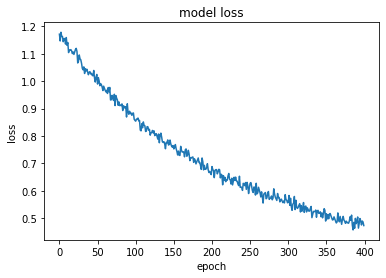

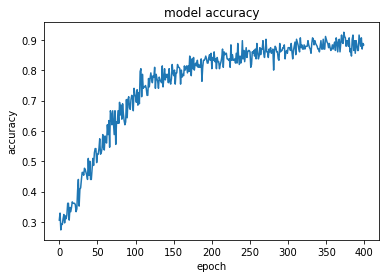

In [20]:
# plot the loss and accuracy curves
plt.plot( hist_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.plot( hist_acc )
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

### Fine Tuning

In the feature extraction, you were only training a few layers on top of a base model. The weights of the pre-trained network were not updated during training.

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.

In [21]:
# unfreeze the base model
base_model.trainable = True
fine_tune_at = 100



In [22]:
# print the number of layers in the base model
print(base_model.layers)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fddf191dc50>, <tensorflow.python.keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7fddf0c4cf90>, <tensorflow.python.keras.layers.preprocessing.normalization.Normalization object at 0x7fddf0c03b10>, <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7fddf0c03990>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fddf0c22bd0>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fddf0beaa10>, <tensorflow.python.keras.layers.core.Activation object at 0x7fddf0becfd0>, <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x7fddf0b9ebd0>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7fddf0b9ad10>, <tensorflow.python.keras.layers.core.Activation object at 0x7fddf0b37c10>, <tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7fddf0bec790>, <tensorflow.python.keras.la

You should try to fine-tune a small number of top layers rather than the whole MobileNet model. In most convolutional networks, the higher up a layer is, the more specialized it is. The first few layers learn very simple and generic features that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work with the new dataset, rather than overwrite the generic learning.

In [23]:
# Decide the number of layers you want to freeze and freeze them.
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [24]:
# compile the model again.
# It is advisable to use a lower learning rate here so that updates are not too huge and the model does not overfit.
# print model summary
model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 200, 200, 3)       0         
_________________________________________________________________
efficientnetb7 (Functional)  (None, 7, 7, 2560)        64097687  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2560)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 7683      
Total params: 64,105,370
Trainable params: 63,668,843
Non-trainable params: 436,527
___________________________________________

In [25]:
# fit the model again.
total_epochs =  epochs + 100

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1])

Epoch 400/500
7/7 [==============================] - 38s 1s/step - loss: 0.4301 - accuracy: 0.8962
Epoch 401/500
7/7 [==============================] - 9s 1s/step - loss: 0.3850 - accuracy: 0.9020
Epoch 402/500
7/7 [==============================] - 9s 1s/step - loss: 0.3255 - accuracy: 0.9350
Epoch 403/500
7/7 [==============================] - 9s 1s/step - loss: 0.2746 - accuracy: 0.9569
Epoch 404/500
7/7 [==============================] - 9s 1s/step - loss: 0.2192 - accuracy: 0.9733
Epoch 405/500
7/7 [==============================] - 9s 1s/step - loss: 0.2139 - accuracy: 0.9256
Epoch 406/500
7/7 [==============================] - 9s 1s/step - loss: 0.1631 - accuracy: 0.9566
Epoch 407/500
7/7 [==============================] - 9s 1s/step - loss: 0.1288 - accuracy: 0.9865
Epoch 408/500
7/7 [==============================] - 9s 1s/step - loss: 0.1377 - accuracy: 0.9764
Epoch 409/500
7/7 [==============================] - 9s 1s/step - loss: 0.1370 - accuracy: 0.9552
Epoch 410/500
7/7 [

INFO:tensorflow:Assets written to: /content/model2/assets


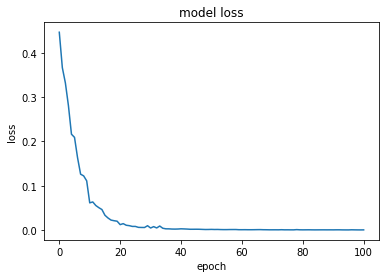

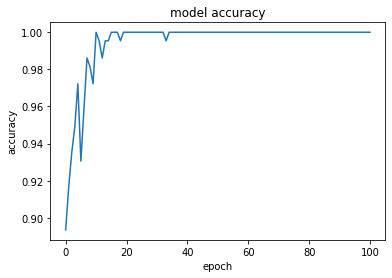

In [26]:
# plot the loss and accuracy curves again
model_path = os.path.join(os.getcwd(),"model2")
model.save(model_path)
hist_fine_acc = history_fine.history['accuracy']
hist_fine_loss = history_fine.history['loss']
plt.plot( hist_fine_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
plt.plot( hist_fine_acc )
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

### Prediction

Now we will use our model to make predictions on test set. Store the predictions like in sample_submission.csv file. 

sample_submission.csv
- 4 columns
- 1 row for each test image (total 853 rows)
- 1st column = image file name
- 2nd column = probability of the given image being qingqi
- 3rd column = probability of the given image being rickshaw
- 4th column = probability of the given image being tanga

In [27]:

def test_img_label_generator(filepaths,input_shape):
  images = []
  for filepath in filepaths:
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    img = resize(img, input_shape, preserve_range=True)
    yield img
def test_batch_data_generator(filepaths = [],input_shape = (256,256,3),batch_size = 32):
  running = True
  while running:
    img_batch = []
    gen = test_img_label_generator(filepaths,input_shape)
    for img in tqdm(gen):
      img_batch.append(img)
      if len(img_batch) == batch_size:
        yield np.stack(img_batch,axis = 0)
        img_batch = []
      if len(img_batch) != 0:
        yield np.stack(img_batch,axis = 0)
        img_batch = []
        

In [28]:
# Read and preprocess test data. Remeber to store the names of image files
qingqi_preds,rickshaw_preds,tanga_preds = [],[],[]
for path in testing_paths:
  img = keras.preprocessing.image.load_img(
    path, target_size=input_shape +(3,)
  )
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)  
  predictions = model.predict(img_array)
  qingqi = predictions[0][0]
  rickshaw = predictions[0][1]
  tanga = predictions[0][2]
  qingqi_preds.append(qingqi)
  rickshaw_preds.append(rickshaw)
  tanga_preds.append(tanga)

In [29]:
# store the predictions in a .csv file like in sample_submission.csv (Hint: pandas may be helpful here)
import pandas as pd
test_filenames = [f.split("/")[-1].split(".jpg")[0] for f in testing_paths]
data = {'id': test_filenames, 'qingqi':qingqi_preds, 'rickshaw': rickshaw_preds,'tanga':tanga_preds}
df = pd.DataFrame(data = data)

In [30]:
df.to_csv("submission.csv",index= False)